K. Collins

> Exercise: Project 1 Part 3

> Week: 3





In [271]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import data into dataframe
filename = '/content/drive/MyDrive/CodingDojo/Week_2/PandasForDataManipulation/sales_predictions.csv'
df = pd.read_csv(filename)

#inspect data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

In [272]:
# Data inspection of finds the following:
#  Finding 1) There are blanks in the 'Item Weight' column - I observe association between "Item_Identifier" and "Item_Weight".
#     Solution - Each 'Item_Identifier' has a unqiue 'Item_Weight'. Use mode() to associate correct weight per item identifier.
#  Finding 2) There are abbreviations in "Item_Fat_Content" column. There are two unique enumerations; 'Regular' and 'Low Fat'.
#     Solution - Instances of 'reg' and 'LF' are removed and replaced with 'Regular' and 'Low Fat', respectively.   
#  Finding 3) There are zero values in the 'Item_Visibility' column. I Observe assocation between "Item_Identifier" and "Item_Visibility".
#     Solution - Use Mean() on each instance of "Item_Identifier" and replace zero value with mean visibility for that identifier 
#  Finding 4) - There are blanks in the "Outlet_Size" column. I observe association between "Outlet_Size", and the "Outlet_Type" 
#               and "Outlet_Location_Type" columns. Using "Outlet_Type" as the key, I find the following:
#               4.1 (Outlet_Type = Grocery)(Outlet_Location_Type = ALL): Blanks exist. (Outlet Size = Small) for all other values. 
#               4.2 (Outlet_Type = Supermarket Type1)(Outlet_Location_Type = Tier 1): No blanks.
#               4.3 (Outlet_Type = Supermarket Type1)(Outlet_Location_Type = Tier 2): Blanks exist. (Outlet_Size = Small) for all other values. 
#               4.4 (Outlet_Type = Supermarket Type1)(Outlet_Location_Type = Tier 3): No blanks.            
#               4.5 (Outlet_Type = Supermarket Type2)(Outlet_Location_Type = ALL): No blanks.   
#               4.6 (Outlet_Type = Supermarket Type3)(Outlet_Location_Type = ALL): No blanks. 
#               Solution: Use mode() function to replace blanks in 4.1 and 4.3 with 'Small' given Outlet_Size = Small for all other associated 
#                         values. Ommision appears completely random. 
#
# Code sections follow to address each finding  


# Sort by "Item_Identifier". 
df = df.sort_values(by = 'Item_Identifier')
df = df.reset_index(drop=True)

#print initial dataframe
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
8519,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
8520,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
8521,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [273]:
# Finding 1) There are blanks in the 'Item Weight' column
# Finding 3) There are zero values in the 'Item_Visibility' column. 

# Find the unique weight for each item identifier
setModeWeight = df.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.mode)

# Find the mean item visibility for each item identifier
setMeanVisibility = df.groupby(['Item_Identifier'])['Item_Visibility'].mean()

# temporarily set the dataframe index to the item identifier for key association
df = df.set_index(['Item_Identifier'])

# Filter for cases where item visibility is 0
visibiltyFilter = df.Item_Visibility == 0.0

# Filter for cases where item weight is blank
weightFilter = df.Item_Weight.isna() == True

# replace 0s with the calculated mean of item visibilites for each unique item identifier 
df.loc[visibiltyFilter, 'Item_Visibility'] = setMeanVisibility

# replace blanks with the unique weight for each item identifier
df.loc[weightFilter, 'Item_Weight'] = setModeWeight

# restore to the intial index
df = df.reset_index()

#print dataframe
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.6,LF,0.031956,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.6,Low Fat,0.031956,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
8519,NCZ54,14.65,Low Fat,0.080426,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
8520,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
8521,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [274]:
#Finding 2) There are abbreviations in "Item_Fat_Content" column.


# Identify the enumerations in the initial data
df['Item_Fat_Content'].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [275]:
#Finding 2) - Con't. 

# Replace abbreviations with unique 'Item_Fat_Content' enumurations found in the data. 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

# Show enumerations in the modified data
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [276]:
#Finding 4) - There are blanks in the "Outlet_Size" column.

# Find unique outlet sizes for each outlet type. See the finding description above.
setModeSize = df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

# temporarily set the dataframe index to the outlet type for key association
df = df.set_index(['Outlet_Type'])

# Filter for cases where the outlet size is blank
sizeFilter = df.Outlet_Size.isna() == True

# replace blanks with the outlet size associated with outlet types
df.loc[sizeFilter, 'Outlet_Size'] = setModeSize

# restore to the intial index
df = df.reset_index()

#print dataframe
df

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,Grocery Store,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Small,Tier 3,283.6308
1,Supermarket Type1,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Small,Tier 2,2552.6772
2,Supermarket Type1,DRA12,11.6,Low Fat,0.031956,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,992.7078
3,Supermarket Type1,DRA12,11.6,Low Fat,0.031956,Soft Drinks,141.6154,OUT045,2002,Small,Tier 2,3829.0158
4,Supermarket Type1,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Supermarket Type1,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,7148.0288
8519,Grocery Store,NCZ54,14.65,Low Fat,0.080426,Household,161.5552,OUT010,1998,Small,Tier 3,324.9104
8520,Supermarket Type3,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,5523.4768
8521,Grocery Store,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,162.4552


In [277]:
# Restore the data's initial column structure
df = df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
        'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 
        'Item_Outlet_Sales']]


Outlet_Type
Grocery Store         340.0
Supermarket Type2    1995.0
Supermarket Type1    2316.0
Supermarket Type3    3694.0
Name: Item_Outlet_Sales, dtype: float64


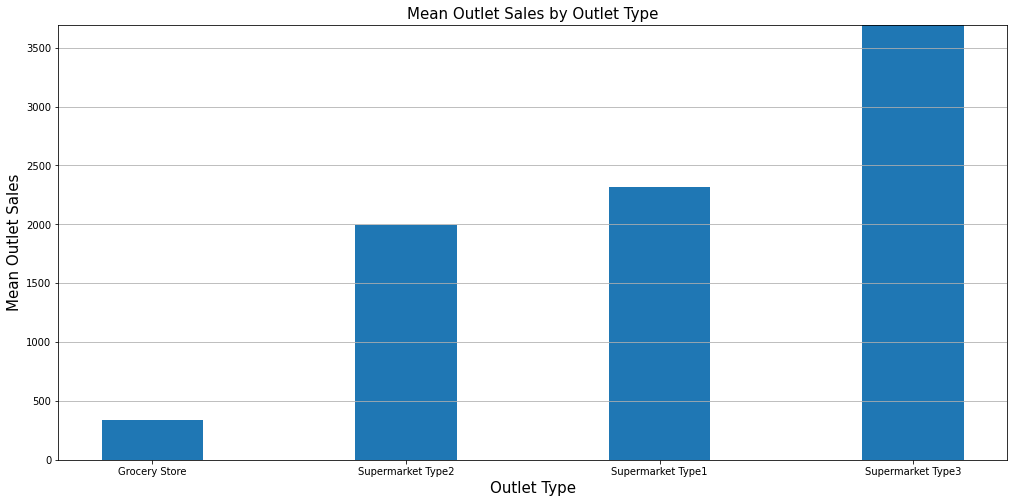

In [278]:
# Create a series that represents the total sales of each 'Outlet_Type'. This represents a big picture of mean sales from each outlet type.
outletSales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
outletSales = outletSales.sort_values(ascending=True)

# Print results
print(outletSales.round())

# Plot the data
plt.figure(figsize=(17.0,8.0))
plt.bar(outletSales.index, outletSales.values, width=0.4)
plt.yticks(np.arange(0, max(outletSales.values).round(), step=500))
plt.title('Mean Outlet Sales by Outlet Type', fontsize=15)
plt.xlabel('Outlet Type', fontsize=15)
plt.ylabel('Mean Outlet Sales', fontsize=15)
plt.ylim(0,max(outletSales.values).round())
plt.grid(axis='y')

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64
Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned         

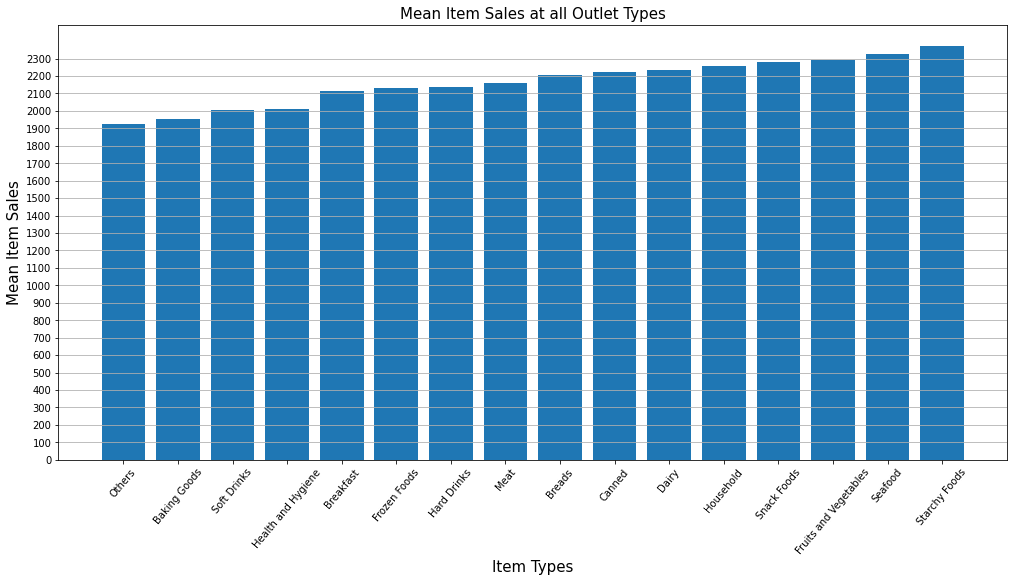

In [279]:
# Create a series that represents the mean total sales of each 'Item_Type'. This represents a big picture of the mean sales of all items.
highestSales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
highestSales = highestSales.sort_values(ascending=True)

# Print results
print(highestSales)

# Plot the data
plt.figure(figsize=(17.0,8.0))
plt.bar(highestSales.index, highestSales.values)
plt.yticks(np.arange(0, max(highestSales.values).round(), step=100))
plt.xticks(rotation = 50) 
plt.title('Mean Item Sales at all Outlet Types', fontsize=15)
plt.xlabel('Item Types', fontsize=15)
plt.ylabel('Mean Item Sales', fontsize=15)
plt.grid(axis='y')

# Check the series
print(highestSales)

412.83104210526324
2640.196610000001
3166.639914285715
4584.759327272727


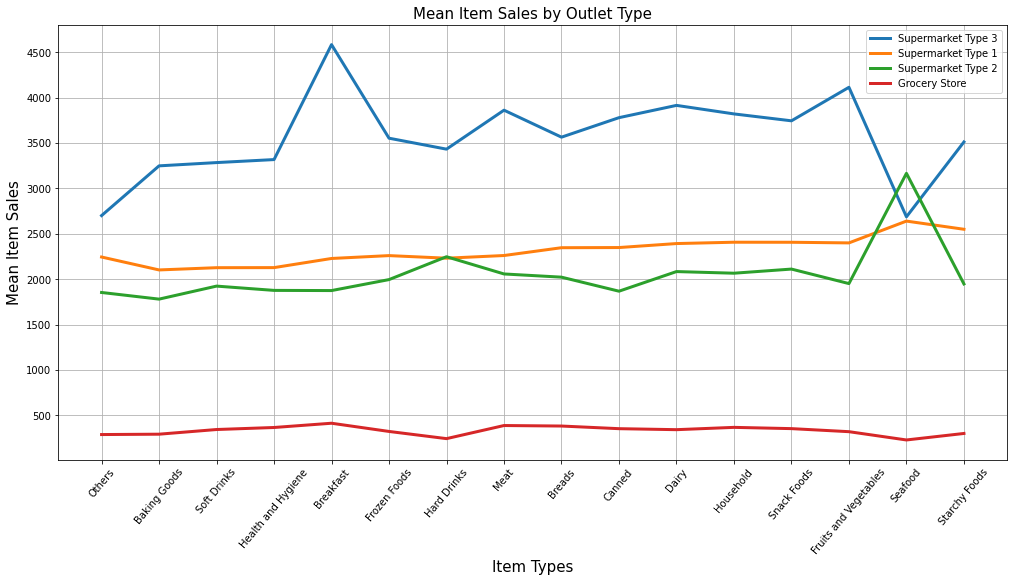

In [280]:
# Create four series that each represent the mean sales for each 'Outlet_Type'. This will provide outlet performance with regards to high sale items. 
highestSalesGrocery = df.loc[df.Outlet_Type == 'Grocery Store', :].groupby('Item_Type')['Item_Outlet_Sales'].mean()
highestSalesSM1 = df.loc[df.Outlet_Type == 'Supermarket Type1', :].groupby('Item_Type')['Item_Outlet_Sales'].mean()
highestSalesSM2 = df.loc[df.Outlet_Type == 'Supermarket Type2', :].groupby('Item_Type')['Item_Outlet_Sales'].mean()
highestSalesSM3 = df.loc[df.Outlet_Type == 'Supermarket Type3', :].groupby('Item_Type')['Item_Outlet_Sales'].mean()


# determine and print the max values for each of the four series (for charting purpose)
print(highestSalesGrocery.values.max())
print(highestSalesSM1.values.max())
print(highestSalesSM2.values.max())
print(highestSalesSM3.values.max())


# Reindex all series with the 'highestSales' index for consistency on the chart's x-axis
highestSalesGrocery = highestSalesGrocery.reindex(highestSales.index)
highestSalesSM1 = highestSalesSM1.reindex(highestSales.index)
highestSalesSM2 = highestSalesSM2.reindex(highestSales.index)
highestSalesSM3 = highestSalesSM3.reindex(highestSales.index)


# plot the data
plt.figure(figsize=(17.0,8.0))
plt.yticks(np.arange(0, max(highestSalesSM3.values).round(), step=500))
plt.plot(highestSalesSM3.index, highestSalesSM3.values, label='Supermarket Type 3', linewidth=3)
plt.plot(highestSalesSM1.index, highestSalesSM1.values, label='Supermarket Type 1', linewidth=3)
plt.plot(highestSalesSM2.index, highestSalesSM2.values, label='Supermarket Type 2', linewidth=3)
plt.plot(highestSalesGrocery.index, highestSalesGrocery.values, label='Grocery Store', linewidth=3)
plt.title('Mean Item Sales by Outlet Type', fontsize=15)
plt.xlabel('Item Types', fontsize=15)
plt.ylabel('Mean Item Sales', fontsize=15)
plt.xticks(rotation = 50) 
plt.legend()
plt.grid()